objective 4

In [1]:
import pandas as pd
data=pd.read_csv('implant.csv')
data

,GeoAreaName,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,9.216,8.863,8.473,8.092,7.753,7.508,7.402,7.249,7.492,7.498,8.273,8.132,9.289,9.099,8.948,8.793,9.872,9.792,9.548
1,Algeria,8.910,8.794,8.683,8.573,8.461,8.344,7.420,7.305,6.640,6.441,7.021,6.890,6.757,6.623,6.780,7.851,11.884,16.024,16.245
2,American Samoa,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,43.399,43.362,43.304,43.293,68.641,75.085,91.343
3,Angola,14.369,13.904,13.457,13.014,26.442,25.533,24.634,36.270,35.785,34.506,33.339,32.175,34.522,36.439,37.716,36.474,60.633,81.472,89.687
4,Anguilla,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,4.495,4.444,80.842,79.908,148.320,146.764,77.419
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336,Viet Nam,42.543,48.733,52.056,52.204,52.233,52.423,54.796,59.000,70.059,84.082,100.193,115.237,152.706,164.196,166.431,174.891,186.732,192.539,195.841
337,Yemen,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.043,0.044,0.043,0.054,0.056,0.094,0.194,2.264,2.945,3.593,8.772
338,Zambia,173.029,168.558,164.264,154.775,150.836,146.948,143.119,134.609,133.354,130.260,142.247,138.015,134.282,154.253,149.513,145.548,148.578,144.850,140.757
339,Zimbabwe,61.423,61.204,62.722,62.576,62.379,62.086,61.684,61.178,67.353,66.600,65.791,66.198,65.138,64.441,63.376,63.536,62.883,62.326,82.532


In [2]:
mean_year=pd.Series(data[1:].mean())
mean_year

2000     79.382574
2001     79.425415
2002     79.896362
2003     80.067944
2004     80.802238
2005     82.091647
2006     81.954150
2007     97.985715
2008     98.195182
2009    103.446197
2010    109.402094
2011    113.099156
2012    123.144632
2013    127.734412
2014    134.270291
2015    144.015547
2016    152.657118
2017    158.716088
2018    164.306824
dtype: float64

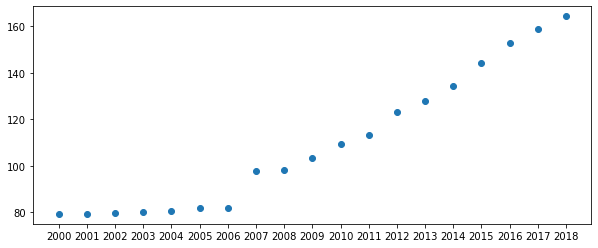

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
plt.scatter(mean_year.index,mean_year)
plt.show()

In [4]:
table=pd.DataFrame(mean_year)
table.columns=['Mean (Y)']

In [5]:
table['X']=range(1,20)
table['XY']=table['Mean (Y)']*table['X']
table['X^2']=table['X']**2
table=pd.DataFrame(table)

In [6]:
sum=pd.DataFrame(table.sum())
sum.columns=['Sigma']
sum

mean=pd.DataFrame(table.mean())
mean.columns=['Mean']
mean

,Mean
Mean (Y),110.031241
X,10.000000
XY,1253.289840
X^2,130.000000


In [7]:
table=pd.concat([table,sum.T,mean.T])
table

,Mean (Y),X,XY,X^2
2000,79.382574,1.0,79.382574,1.0
2001,79.425415,2.0,158.850829,4.0
2002,79.896362,3.0,239.689085,9.0
2003,80.067944,4.0,320.271776,16.0
2004,80.802238,5.0,404.011191,25.0
2005,82.091647,6.0,492.549882,36.0
2006,81.954150,7.0,573.679050,49.0
2007,97.985715,8.0,783.885718,64.0
2008,98.195182,9.0,883.756641,81.0
2009,103.446197,10.0,1034.461971,100.0


In [8]:
numerator=table['XY'].loc['Sigma']-table['X'].loc['Sigma']*table['Mean (Y)'].loc['Sigma']/20
numerator

3951.86790441176

In [9]:
denominator=table['X^2'].loc['Sigma']-table['X'].loc['Sigma']**2/20
denominator

665.0

In [10]:
b=numerator/denominator
b

5.942658502874827

In [11]:
def eq_regression(x):
    y=table['Mean (Y)'].loc['Mean']+b*(x-table['X'].loc['Mean'])
    return(y)

estimated watts per capita for next 11 years [175.40048486289248, 181.34314336576728, 187.28580186864212, 193.22846037151695, 199.17111887439177, 205.11377737726662, 211.0564358801414, 216.99909438301626, 222.94175288589108, 228.8844113887659, 234.82706989164075]


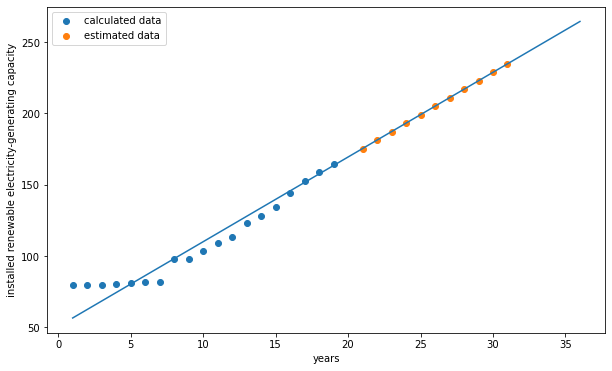

In [16]:
plt.figure(figsize=(10,6))
x_values=[]
y_values=[]
for x in range(21,32):
    x_values.append(x)
    y_values.append(eq_regression(x))
print("estimated watts per capita for next 11 years",y_values)

aabbccdd=[]
for i in mean_year.index:
    aabbccdd.append(int(i)-1999)
plt.scatter(aabbccdd,mean_year,label='calculated data')
plt.scatter([range(21,32)],y_values,label='estimated data')
plt.legend()
y_line=[]
x_line=[]
for x in range(1,37):
    x_line.append(x)
    y_line.append(eq_regression(x))
plt.plot(x_line,y_line)
plt.xlabel("years")
plt.ylabel("installed renewable electricity-generating capacity")
plt.show()

In [17]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm

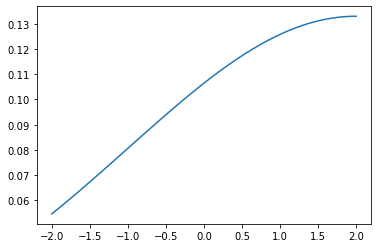

In [21]:
domain= np.linspace(-2,2,1000)
plt.plot(domain,norm.pdf(domain,2,3))
plt.show()